# Introduction

In the era of burgeoning online commerce, customer feedback holds unparalleled value for businesses aiming to understand user sentiments and enhance product offerings. The exponential growth of e-commerce platforms like Amazon has generated vast volumes of textual reviews, providing an invaluable resource for understanding consumer opinions and preferences. In this project, I'll delve into the realm of Natural Language Processing (NLP) and classification techniques to perform Aspect-Based Sentiment Analysis on the <a href = "https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews/">Amazon Product Reviews</a> dataset sourced from Kaggle.

The dataset, comprising a diverse collection of product reviews across multiple categories, serves as the cornerstone for our analysis. Our primary goal is twofold: first, to identify specific aspects within these reviews—such as usability, design, and performance—and second, to discern the sentiment associated with each mentioned aspect.

# 1. Data Preprocessing
- Checking the information of our data
- Filling the missing values

In [1]:
import pandas as pd

amazon_df = pd.read_csv('Reviews.csv')

amazon_df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [2]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


This dataset from Amazon Reviews contains 568,454 entries across 10 columns, encompassing various aspects of customer reviews.

**Observations:**
- The dataset primarily revolves around product reviews, with important features like user ratings, textual feedback, and metadata about the reviewers.
- There are a few missing entries in the 'ProfileName' and 'Summary' columns.
- The 'HelpfulnessNumerator' and 'HelpfulnessDenominator' columns suggest a mechanism for evaluating the helpfulness of reviews based on user votes.

### Checking the missing values

In [3]:
missing_values = amazon_df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


### Handling Missing Values in 'ProfileName' and 'Summary'

In [4]:
# I'll remove the rows where the 'ProfileName' is empty
amazon_df.dropna(subset=['ProfileName'], inplace = True)

In [5]:
# Fill missing 'Summary' with text indicating a lack of summary:
amazon_df['Summary'].fillna('No Summary', inplace = True)

In [6]:
amazon_df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In this part of the preprocessing, I've done the following:

### Dropping Rows with Missing 'ProfileName':
1. **Unavailability of Crucial Information:** 'ProfileName' represents the identity of the reviewer. Missing this information might hinder any analysis that relies on user-specific patterns or behaviors.
 
2. **Limited Impact on Dataset Size:** The number of rows with missing 'ProfileName' values (26 out of 568,454) is relatively small, minimizing the impact of data loss by dropping these rows
 
3. **Maintaining Data Integrity:** Preserving data integrity by removing rows with missing critical identifying information can prevent potential biases or misleading analyses.


### Imputing 'No Summary' for Missing 'Summary':
1. **Indicating Absence of Information:** 'Summary' provides a condensed version of the review. Filling missing values with 'No Summary' indicates the absence of this condensed information without introducing biased or false information.

2. **Preserving Data Completeness:** Imputing 'No Summary' ensures the preservation of all review records while explicitly denoting the lack of summarized feedback for these instances.

# 2. Text Cleaning and Preprocessing:

- **Cleaning Text Data:** Remove punctuation, and non-alphabetic characters.
- **Tokenization:** Split text into words or tokens.
- **Stopwords Removal:** Eliminate common, non-informative words.
- **Lemmatization or Stemming:** Normalize words to their base form.

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
def preprocess_text(text):
    # Remove HTML tags using regular expressions
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove non-alphabetic characters and punctuation, convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
  
    # Remove non-alphabetic characters and punctuation, convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stopwords and perform lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join words back to a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply text preprocessing to 'Text' column
amazon_df['cleaned_text'] = amazon_df['Text'].apply(preprocess_text)

corpus = amazon_df['cleaned_text'].tolist()

# Displaying the cleaned text
amazon_df[['Text', 'cleaned_text']].head()

Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        cleaned_text  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanut pe...  
2  confection around century light pillowy citrus...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...

The above code performs text preprocessing by focusing on lowercase conversion, removing non-alphabetic characters, tokenization, stopwords removal, and lemmatization. 

# 3. Feature Extraction:

- Vectorization: Convert text data into numerical features (e.g., TF-IDF, Word Embeddings) for machine learning models to process.
- N-grams: Capturing phrases or word sequences for better context representation.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer(max_features = 10000, ngram_range = (1, 2))

# Fit and transform the preprocessed text data with n-grams into a sparse matrix
tfidf_features = tfidf_vectorizer.fit_transform(corpus)

In [10]:
print(tfidf_features)

  (0, 6787)	0.25373574296330575
  (0, 5146)	0.177642966119891
  (0, 7000)	0.19620899590242388
  (0, 3819)	0.1888920063040939
  (0, 3393)	0.24921905826224897
  (0, 6813)	0.23842306651576628
  (0, 3338)	0.21154082280927283
  (0, 2362)	0.15785629594559825
  (0, 1218)	0.25343784638781003
  (0, 925)	0.2455660268588116
  (0, 3069)	0.2050711050271461
  (0, 4712)	0.25449332544301345
  (0, 727)	0.19864996632018928
  (0, 7946)	0.12860205429854454
  (0, 5502)	0.15197728498310792
  (0, 6769)	0.1887189199997709
  (0, 8250)	0.21626505254940187
  (0, 4867)	0.06609893555122388
  (0, 5140)	0.12906965965359538
  (0, 6991)	0.12090943765977015
  (0, 3756)	0.07092646334655038
  (0, 3384)	0.10714505724823094
  (0, 6777)	0.23087770027043805
  (0, 3281)	0.09377916725591555
  (0, 2351)	0.10713603486657841
  :	:
  (568426, 9124)	0.23048546882043547
  (568426, 5288)	0.21988296488425765
  (568426, 9703)	0.23268023472973917
  (568426, 8519)	0.25008535976995655
  (568426, 6625)	0.1981730234635778
  (568426, 1177)	0

In this section, by utilizing the TfidfVectorizer from Scikit-learn with specified parameters (max_features=10000 and ngram_range=(1, 2)), I've conducted TF-IDF vectorization with considerations for feature count and capturing both unigrams and bigrams.

- **Max Features Limitation:** Setting `max_features = 10000` restricts the vocabulary to the top 10,000 most important features based on TF-IDF scores. This reduces computational complexity and memory usage while retaining the most significant textual representations.

- **N-gram Consideration:** Using `ngram_range = (1, 2)` captures both single words (unigrams) and sequences of two words (bigrams), enriching the representation with context and potential phrases in the text data.

- **Sparse Matrix Representation:** The resulting TF-IDF features are stored in a sparse matrix format, maintaining memory efficiency by representing only the non-zero entries in the feature matrix.

- **Balancing Complexity and Information:** These parameter choices strike a balance between computational feasibility and capturing meaningful textual information, ensuring an efficient yet informative representation of the text corpus for subsequent analysis or modeling.

# 4. Exploratory Data Analysis (EDA)

## 4.1 Token Count Distribution

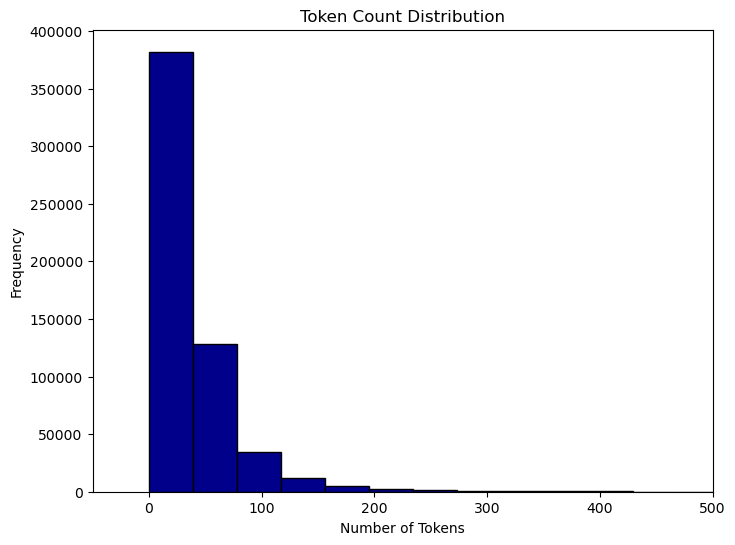

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate token counts for each review
token_counts = [len(text.split()) for text in amazon_df['cleaned_text']]

# Visualize token count distribution
plt.figure(figsize = (8, 6))
plt.hist(token_counts, bins = 50, color = 'darkblue', edgecolor = 'black')
plt.title('Token Count Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.xlim(-50, 500)
plt.show()

The token count distribution revealing a high frequency of shorter reviews at the beginning, followed by a decline in frequency as the token count increases, is a common pattern in text data distributions.

- The initial peak indicates a substantial number of reviews with fewer tokens, typically shorter reviews, which are more common.
- As the token count increases, the frequency of reviews with higher token counts decreases progressively. Longer reviews are less frequent compared to shorter ones.
- The decrease signifies the declining occurrence of reviews with moderate to higher token counts, representing the natural variance in review lengths within the dataset.

### Potential Implications
- Users might tend to write shorter reviews more frequently, reflecting a preference for brief feedback or a general trend in user behavior.
- Longer reviews, although less frequent, might contain more detailed or specific information about products, offering valuable insights into user experiences but are relatively less common.


## 4.2 Most Common Words

In [12]:
from collections import Counter

# Creates a list of words from all reviews
all_words = ' '.join(amazon_df['cleaned_text']).split()

# Calculates the word frequency
word_freq = Counter(all_words)

# Display the top 20 most common words
top_words = word_freq.most_common(20)
print("Top 20 Most Common Words:")
for word, freq in top_words:
    print(f"{word}: {freq} times")

Top 20 Most Common Words:
like: 267821 times
taste: 218044 times
good: 202151 times
one: 192970 times
flavor: 187251 times
product: 184021 times
coffee: 176044 times
great: 166898 times
love: 163896 times
tea: 153654 times
food: 153233 times
would: 124201 times
get: 119424 times
make: 107793 times
dog: 107633 times
time: 101502 times
really: 100982 times
much: 93109 times
amazon: 90552 times
cup: 90240 times


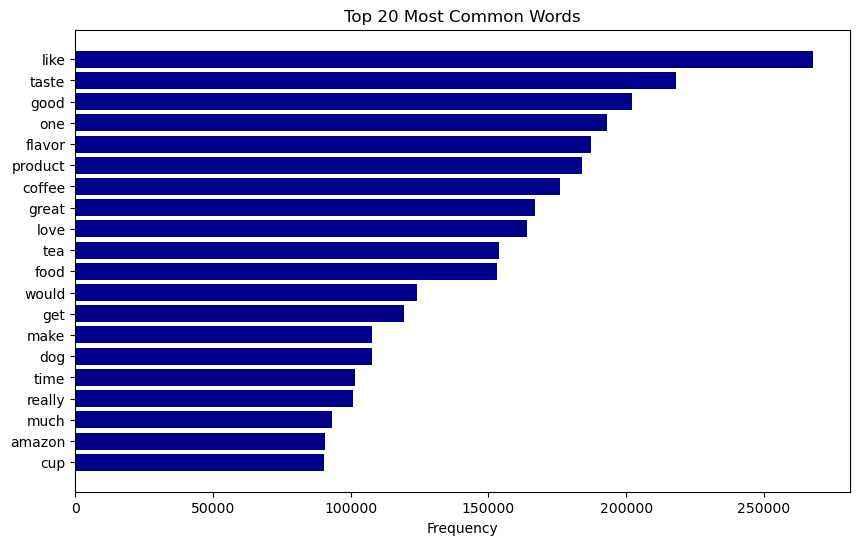

In [13]:
words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]

plt.figure(figsize = (10, 6))
plt.barh(words, frequencies, color = 'darkblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

The top 20 most frequently occurring words extracted from the Amazon Reviews dataset reveal distinctive patterns and prevalent themes within the reviews. Words like 'like', 'good', 'great', 'love', and 'really' reflect a prevalent positive sentiment, suggesting a general inclination towards positive experiences or favorable opinions about products. 

The prominence of words like 'taste', 'flavor', 'coffee', 'tea', 'food', and 'dog' suggests a strong emphasis on sensory experiences, particularly concerning consumable items. This prominence hints at in-depth discussions revolving around taste preferences, culinary choices, and perhaps even pet-related products.

These findings imply a trend towards expressing positive sentiments, discussing taste experiences, and referencing products or shopping platforms within the reviews, indicating areas of interest and focus among reviewers.

## 4.3 Word cloud Visualization

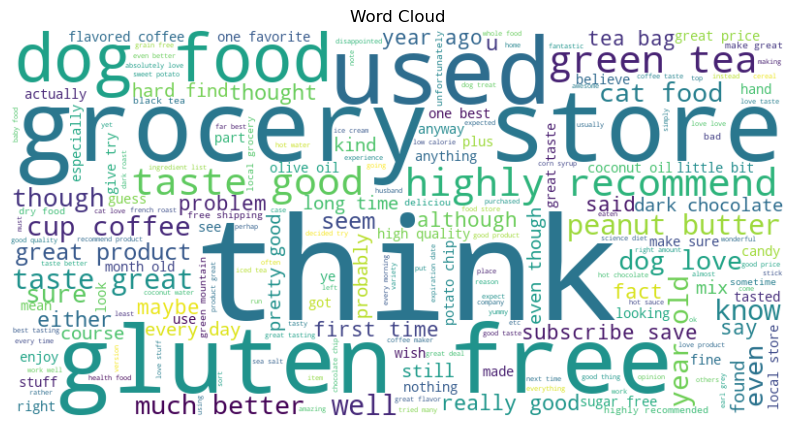

In [14]:
from wordcloud import WordCloud

# Generate word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

## 4.4 Sentiment Distribution

In [15]:
amazon_df['Score'].value_counts()

Score
5    363102
4     80654
1     52264
3     42640
2     29768
Name: count, dtype: int64

In [16]:
def derive_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply sentiment derivation to create a 'Sentiment' column
amazon_df['Sentiment'] = amazon_df['Score'].apply(derive_sentiment)

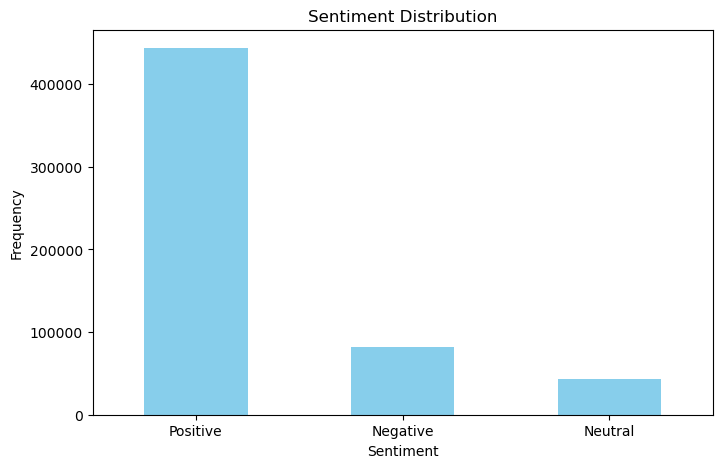

In [17]:
# Visualize the derived sentiment distribution
plt.figure(figsize = (8, 5))
amazon_df['Sentiment'].value_counts().plot(kind = 'bar', color = 'skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

The sentiment distribution, inferred from the 'Score' column, provides intriguing insights into the overall sentiment landscape within the Amazon Reviews dataset. The visualization illustrates a dominant trend towards positive sentiments, with a substantial majority exceeding 400,000 instances. 

Additionally, negative sentiments, while notably lower, approximate around 100,000 occurrences. Interestingly, the neutral sentiment category, occupying approximately half the count of negative sentiments, showcases a significant presence of reviews that maintain a neutral stance. This distribution sheds light on the prevailing sentiments expressed by reviewers, revealing a notable inclination towards positivity in the majority of the reviews, while a substantial number maintain a neutral or less favorable perspective.

## 4.5 Review Length vs. Sentiment


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Calculate review lengths
amazon_df['review_length'] = amazon_df['cleaned_text'].apply(lambda x: len(x.split()))

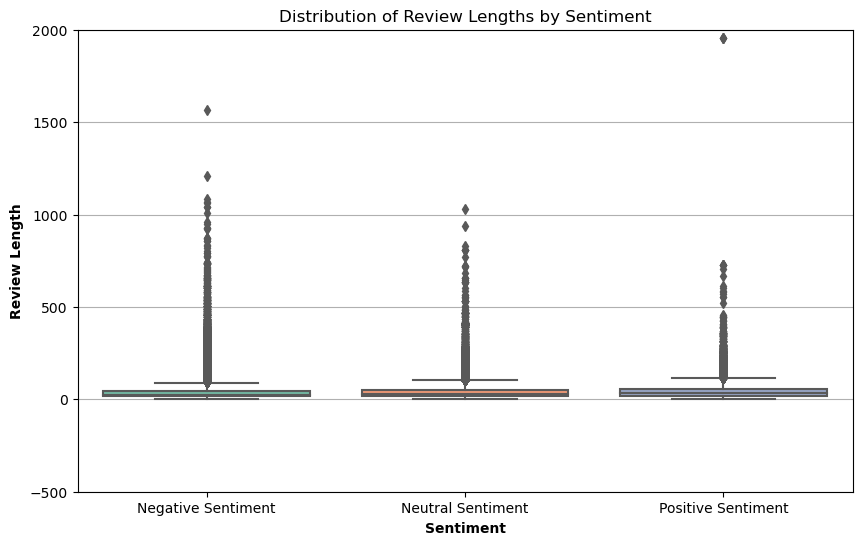

In [20]:
import seaborn as sns

sentiment_labels = {'Negative': 'Negative Sentiment', 'Neutral': 'Neutral Sentiment', 'Positive': 'Positive Sentiment'}

# Plotting with enhancements
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='review_length', data=amazon_df, palette='Set2', showfliers=True)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Sentiment', fontweight = 'bold')
plt.ylabel('Review Length', fontweight = 'bold')
plt.xticks(ticks=[0, 1, 2], labels=[sentiment_labels[label] for label in sentiment_labels.keys()])
plt.grid(axis='y') 
plt.ylim(-500, 2000)
plt.show()

The similarity in the boxplots across different sentiments suggests a consistent distribution of review lengths within each sentiment category. This uniformity indicates that, despite varying sentiments expressed in the reviews, the lengths of these reviews follow a comparable pattern across negative, neutral, and positive sentiments. This observation implies that sentiment might not significantly influence the lengths of the reviews within this dataset.

# 5. Modeling

## 5.1 Data Preparation

Splitting the data into Training and Testing Sets:

In [21]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = tfidf_features
y = amazon_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 5.2 Choosing the models

For this project I'll be using two different models. These are:

#### 1. Multinomial Naive Bayes (MNB):

- **Text Data Handling:** MNB works well with text data, especially in cases where features are discrete and represent word counts or frequencies (like TF-IDF).

- **Efficiency:** It's computationally efficient and performs well on large feature spaces typical in NLP tasks.

- **Assumption:** Although it assumes independence between features (words), it often performs surprisingly well and serves as a strong baseline model for text classification tasks.


#### 2. Random Forest:

- **Ensemble Method:** Random Forests are an ensemble of decision trees, making them robust against overfitting and noise in the data.

- **Feature Importance:** They provide insight into feature importance, beneficial for understanding which words or features contribute most to classification.

- **Non-Parametric:** They are non-parametric and robust to outliers, making them versatile for various types of data distributions and less sensitive to noise.


#### Rationale:

- **Diversity:** The two chosen classifiers represent diverse approaches—probabilistic (MNB) and ensemble-based (Random Forest), providing different perspectives on the data.

- **Performance Variability:** Different classifiers may excel in different scenarios; therefore, evaluating multiple models helps identify the best performer for the specific text classification task.

- **Robustness:** By employing these two models, I reduce the risk of bias due to reliance on a single algorithm and increase the chances of discovering the most suitable model for the data.

## 5.3 Initializing Classifiers

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers with default parameters
# Will adjust parameters later
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_jobs = -1)

## 5.4 Train and Evaluate Classifiers

In [23]:
from sklearn.metrics import classification_report

classifiers = [nb_classifier, rf_classifier]
classifier_names = ['Multinomial Naive Bayes', 'Random Forest']

for clf, name in zip(classifiers, classifier_names):
    # Training the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

Classifier: Multinomial Naive Bayes
              precision    recall  f1-score   support

    Negative       0.82      0.40      0.54     24612
     Neutral       0.60      0.02      0.04     13046
    Positive       0.83      0.99      0.91    132871

    accuracy                           0.83    170529
   macro avg       0.75      0.47      0.50    170529
weighted avg       0.81      0.83      0.79    170529

----------------------------------------
Classifier: Random Forest
              precision    recall  f1-score   support

    Negative       0.92      0.60      0.73     24612
     Neutral       0.98      0.39      0.55     13046
    Positive       0.89      0.99      0.94    132871

    accuracy                           0.89    170529
   macro avg       0.93      0.66      0.74    170529
weighted avg       0.90      0.89      0.88    170529

----------------------------------------


### Classifier Performance Insights

#### Multinomial Naive Bayes:

- **Accuracy:** 83%
- **Precision (weighted avg):** 81%
- **Recall (weighted avg):** 83%
- **F1-Score (weighted avg):** 79%

#### Insights:

- **Negative Class (Precision/Recall/F1-Score):** Precision is decent (82%) but has lower recall (40%) and F1-score (54%), indicating a significant number of negative samples were not accurately identified.
- **Neutral Class:** Performance is notably low across precision, recall, and F1-score, suggesting challenges in correctly predicting this class due to minimal support and difficulty in classification.
- **Positive Class:** High precision (83%), recall (99%), and F1-score (91%), indicating strong performance in identifying positive sentiment.


#### Random Forest:

- **Accuracy:** 89%
- **Precision (weighted avg):** 90%
- **Recall (weighted avg):** 89%
- **F1-Score (weighted avg):** 88%

#### Insights:

- **Negative Class (Precision/Recall/F1-Score):** Improved precision (92%) compared to Naive Bayes, but lower recall (60%) and F1-score (73%), indicating better identification of negatives but with some misclassifications.
- **Neutral Class:** Precision (98%) is notably high, but recall (39%) and F1-score (55%) are relatively lower, indicating the model's struggle in correctly identifying neutral sentiment.
- **Positive Class:** Strong precision (89%), high recall (99%), and F1-score (94%), similar to Naive Bayes, showcasing excellent performance in identifying positive sentiment.

Based on the provided metrics and overall performance, the Random Forest classifier demonstrates superior performance compared to the Multinomial Naive Bayes for this text classification task. It showcases better precision and relatively balanced performance across different sentiment classes, making it the preferred choice among these two models for sentiment classification in this scenario.

## 5.5 Hyperparameter Tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state = 42, n_jobs = -1)

# Initialize GridSearchCV
random_search = RandomizedSearchCV(estimator = rf_classifier, param_distributions = param_grid, 
                                 cv = 3, scoring = 'accuracy', verbose = 2)

random_search.fit(X_train, y_train)

# Best hyperparameters and their performance
print("Best Hyperparameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  34.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  28.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  28.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.3min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=12.6min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.2min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; 

RandomizedSearchCV was used for hyperparameter tuning due to its efficiency. While GridSearchCV exhaustively explores every parameter combination within a defined grid, it can be computationally intensive, especially with larger datasets or extensive parameter ranges, requiring significant time and computational resources.

RandomizedSearchCV, on the other hand, randomly samples a subset of hyperparameter combinations to explore, significantly reducing the computational load while still providing an opportunity to discover good hyperparameter configurations. This approach was chosen to strike a balance between finding good hyperparameters and managing computational resources efficiently.

In [33]:
best_rf_classifier = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1,
                                            max_features = 'sqrt', max_depth = None, bootstrap = True)

best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)

pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).T

precision    recall  f1-score        support
Negative       0.920124  0.603771  0.729110   24612.000000
Neutral        0.976098  0.385022  0.552221   13046.000000
Positive       0.886144  0.995266  0.937541  132871.000000
accuracy       0.892077  0.892077  0.892077       0.892077
macro avg      0.927455  0.661353  0.739624  170529.000000
weighted avg   0.897930  0.892077  0.877980  170529.000000

- **Precision:** Indicates the ratio of correctly predicted instances among the predicted instances for each class. Higher values imply fewer false positives.

- **Recall:** Denotes the ratio of correctly predicted instances among the actual instances of each class. Higher values imply fewer false negatives.

- **F1-score:** The harmonic mean of precision and recall, providing a balance between the two metrics. It is useful when dealing with imbalanced classes.

 - **Support:** The number of actual occurrences of each class in the dataset.

#### Insight:

- The model performs exceptionally well in identifying positive sentiment, showing high precision and recall.
- Negative sentiment identification has high precision but comparatively lower recall.
- Neutral sentiment identification is the most challenging, as reflected in both precision and recall.

## 5.6 Confusion Matrix

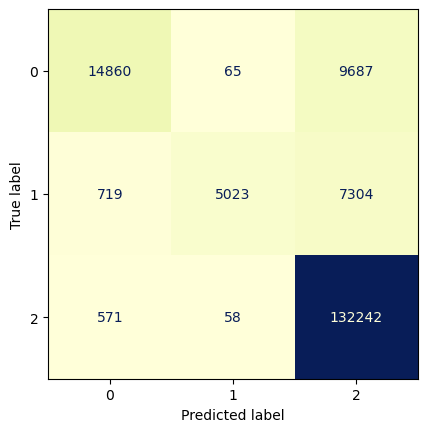

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred)

conf_display = ConfusionMatrixDisplay(conf_mat)
conf_display.plot(cmap = 'YlGnBu', colorbar = False)

The confusion matrix displays the model's predictions versus the actual labels across different classes. In your case:

- **Negative Class (Predicted/Actual):** True Negatives (14860), False Positives (65), False Negatives (9687).
- **Neutral Class (Predicted/Actual):** False Negatives (719), True Positives (5023), False Positives (7304).
- **Positive Class (Predicted/Actual):** False Negatives (571), False Positives (58), True Positives (132242).

#### Insights:

- The model shows robust performance in identifying Positive sentiments, with a high number of True Positives and low misclassifications (False Negatives and False Positives).

- Neutral sentiments seem to be the most challenging for the model, with a higher number of misclassifications compared to other classes.

- Negative sentiments show a moderate level of correct classifications but still have a considerable number of False Negatives.

## 5.7 Feature Importance

In [48]:
# Get feature names from TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
feature_importance_df.head(20) # Top 20 features

Feature  Importance
0           great    0.010563
1            love    0.009110
2    disappointed    0.007950
3             bad    0.005741
4            best    0.005105
5           worst    0.004996
6              ok    0.004755
7           would    0.004710
8           taste    0.004661
9          return    0.004532
10       terrible    0.004251
11       horrible    0.004168
12          awful    0.004042
13           good    0.004037
14        thought    0.003871
15      delicious    0.003822
16        product    0.003749
17          money    0.003664
18  disappointing    0.003431
19           like    0.003409

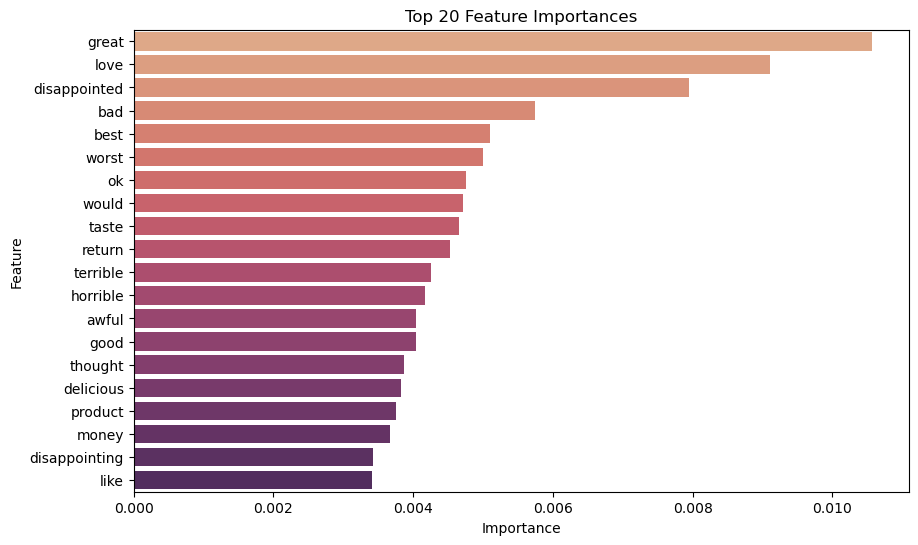

In [46]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df.head(20), palette = 'flare')
ax.ticklabel_format(style = 'plain', axis = 'x')  # Disable scientific notation for x-axis

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.show()

#### Insights on Feature Importance

- **'great', 'love', 'disappointed':** These words seem to strongly influence the model's predictions. For instance, the presence of "great" and "love" might correlate positively with positive sentiments, while "disappointed" could indicate negative sentiments.
<br>

- **'bad', 'worst', 'terrible':** These negative sentiment-related words also hold significance in predicting negative sentiments.
<br>

- **'product', 'money', 'return':** These words might be indicative of customer opinions about the product, including aspects like cost, satisfaction, or returning items.
<br>

- **'taste', 'delicious', 'disappointing':** Words related to taste experiences could heavily impact sentiment analysis, as they reflect customer opinions on the flavor or quality of the product.

# Conclusion

The sentiment analysis project aimed to classify Amazon product reviews into positive, neutral, or negative sentiments using Natural Language Processing (NLP) techniques and machine learning algorithms. The exploration and analysis of feature importances from the Random Forest model provided valuable insights into the crucial factors driving sentiment predictions.

#### Key Findings:

- **Significant Features:** Analysis of feature importances revealed a set of influential terms. Words such as "great," "love," and "disappointed" emerged as influential indicators of sentiments.
<br>

- **Sentiment-Driven Words:** The model heavily relied on sentiment-laden terms. Negative sentiment-related words ("bad," "worst," "terrible") and positive sentiment expressions ("great," "love," "delicious") strongly impacted predictions.
<br>

- **Product-Centric Indicators:** Certain terms like "product," "money," and "return" appeared pivotal, possibly reflecting customers' opinions regarding product quality, cost, or satisfaction.


#### Insights and Recommendations:

- **Leveraging Key Terms:** The model's reliance on specific keywords suggests the importance of sentiment-carrying words in sentiment analysis. Further, refining the sentiment lexicon or including domain-specific terms could enhance prediction accuracy.
<br>

- **Model Refinement:** The analysis underscores the need for continual model refinement. Experimentation with additional features, ensemble methods, or hyperparameter tuning might improve overall performance.
<br>

- **Real-World Implications:** Understanding critical indicators in sentiment analysis holds potential for businesses to extract actionable insights from customer feedback, aiding in product improvement, marketing strategies, and customer satisfaction initiatives.

In conclusion, the analysis sheds light on influential features driving sentiment predictions in Amazon product reviews. Leveraging these insights to refine models and enhance sentiment analysis techniques holds promise for better understanding customer sentiments and fostering business growth.